# Napoleon's March to Moscow

### Import Python tools and Jupyter configuration

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/stiles/.local/share/virtualenvs/notebooks-sxqKeO4C/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

---

## Read data files (via [@andrewheiss](https://github.com/andrewheiss/fancy-minard))

#### Cities

In [4]:
cities = pd.read_csv(
    "data/minard/cities.txt",
    sep="  ",
    header=None,
    names=["long", "lat", "city"],
    engine="python",
).drop(0)
cities

,long,lat,city
1,24.0,55.0,Kowno
2,25.3,54.7,Wilna
3,26.4,54.4,Smorgoni
4,26.8,54.3,Moiodexno
5,27.7,55.2,Gloubokoe
6,27.6,53.9,Minsk
7,28.5,54.3,Studienska
8,28.7,55.5,Polotzk
9,29.2,54.4,Bobr
10,30.2,55.3,Witebsk


In [5]:
cities_gdf = gpd.GeoDataFrame(
    cities, geometry=gpd.points_from_xy(cities["long"], cities["lat"])
)

<AxesSubplot:>

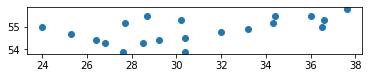

In [6]:
cities_gdf.plot()

## Temperatures

In [7]:
temps = pd.read_csv(
    "data/minard/temps.txt",
    sep=",",
    # header=None,
    # names=["long", "temp", "month", "day", "date"],
    engine="python",
)
temps

,long,temp,month,day,date
0,37.6,0,Oct,18,18OCT1812
1,36.0,0,Oct,24,24OCT1812
2,33.2,-9,Nov,9,09NOV1812
3,32.0,-21,Nov,14,14NOV1812
4,29.2,-11,Nov,24,24NOV1812
5,28.5,-20,Nov,28,28NOV1812
6,27.2,-24,Dec,1,01DEC1812
7,26.7,-30,Dec,6,06DEC1812
8,25.3,-26,Dec,7,07DEC1812


## Troops

In [8]:
troops = pd.read_csv("data/minard/troops.txt")
troops

,long,lat,survivors,direction,group
0,24.0,54.9,340000,A,1
1,24.5,55.0,340000,A,1
2,25.5,54.5,340000,A,1
3,26.0,54.7,320000,A,1
4,27.0,54.8,300000,A,1
5,28.0,54.9,280000,A,1
6,28.5,55.0,240000,A,1
7,29.0,55.1,210000,A,1
8,30.0,55.2,180000,A,1
9,30.3,55.3,175000,A,1


In [16]:
troops = troops.sort_values(by=["group", "survivors"], ascending=False)
troops.head()

,long,lat,survivors,direction,group
45,24.0,55.2,22000,A,3
46,24.5,55.3,22000,A,3
47,24.6,55.8,6000,A,3
48,24.6,55.8,6000,R,3
49,24.2,54.4,6000,R,3


In [10]:
# troops_gdf.plot()

In [47]:
troops_chart = (
    (
        alt.Chart(troops)
        .mark_trail()
        .encode(
            longitude="long:Q",
            latitude="lat:Q",
            size=alt.Size("survivors", scale=alt.Scale(range=[2, 30]), legend=None),
            detail="group",
            color=alt.Color(
                "direction",
                scale=alt.Scale(domain=["A", "R"], range=["#ebd2a8", "#000000"]),
                legend=None,
            ),
            tooltip=[
                alt.Tooltip("lat", title="Latitude"),
                alt.Tooltip("long", title="Longitude"),
                alt.Tooltip("survivors", title="Survivors"),
            ],
        )
    )
    .properties(width=800, height=400)
    .configure_view(strokeOpacity=0)
)

In [48]:
troops_chart

alt.Chart(...)

In [ ]:
s